# NLP Lab 2024 - LAB1: An introduction to Corpus Linguistics
In this lab we delve directly into hands on practice with corpora and do some corpora analysis commonly used in NLP.

To complete this lab you need to read the material associated to this lab; the following two book chapters (also available in the Moodle, under the Corpora and Annotation tab):
- Corpora: McEnery, Oxford Handbook of CL, 2nd editionFile ([link here](https://elearn.uef.fi/mod/resource/view.php?id=607594))
- Corpus annotation: Hovy, Oxford Handbook of CL, 2nd editionFile ([link here](https://elearn.uef.fi/mod/resource/view.php?id=607595))
- Text segmentation: Mikheev, Oxford Handbook of CL, 2nd editionFile ([ADD link]())



We will use Python's popular `nltk` (Natural Language Toolkit) and `matplotlib` for visualizations.

#### **Overview:**
Corpus Linguistics is the study of language based on large collections of "real world" texts known as corpora (the plural of corpus). It involves analyzing patterns, frequencies, and trends in language using computational methods.

In this tutorial, we will:
1. Explore basic concepts of Corpus Linguistics
2. Learn how to work with corpora using Python and the `nltk` library
3. Conduct basic analysis such as word frequency and collocations
4. Hopefully, we'll get to know your own corpus interests (if there are)
5. Questions and answers  during contact session 1


## **Part 1: Introduction, Definitions and Motivation**

### Corpora
First we need to define what Corpora is. Here is an excerpt form Tony McEnery's
"The Oxford Handbook of Computational Linguistics 2nd edition" (Edited by Ruslan Mitkov)


> “[...], a slightly more refined definition of a corpus is needed than that which has been introduced so far. It has been established that __a corpus is a collection of naturally occurring language data. But is any collection of language data, from three sentences to three million words of data, a corpus?__ The term ‘corpus’ should properly only be applied to a well-organized collection of data, collected within the boundaries of a sampling frame designed to (i) allow the exploration of a certain linguistic feature (or set of features) or (ii) permit the training of an NLP tool via the data collected. A sampling frame is of crucial importance in corpus design. Sampling is inescapable. Unless the object of study is a highly restricted sublanguage or a dead language, it is quite impossible to collect all of the utterances of a natural language together within one corpus. As a consequence, the corpus should aim for balance and representativeness within a specific sampling frame, in order to allow a particular variety of language to be studied or modelled.”

### Exercise 1:
__Core concepts__
Q1. Acording to the reading material provided, what is the difference between annotated and unannotated data? What is the utility of annotating data? Add your anwers in the following code box. Include examples.

In [2]:
# Answer to Exercise 1:

# Annotated data refers to data that has been supplemented with labels, annotations, or metadata
# to describe specific features or information within the data. For example, a text corpus may have
# part-of-speech (POS) tags to mark the grammatical class of each word, or time-alignment markers
# may be added to speech data. Unannotated data, on the other hand, is raw data without any added
# information or annotations.

# The primary utility of annotated data is to provide a basis for supervised learning in machine
# learning and natural language processing tasks. For example, an annotated corpus can be used to
# train a POS tagger, enabling a model to learn how to identify and classify different parts of speech.

# Examples:

# Unannotated data:
# "The cat sat on the mat."

# Annotated data:
# "The/DET cat/NOUN sat/VERB on/ADP the/DET mat/NOUN."

# In the example of annotated data, each word is followed by a POS tag, which provides additional
# information for machine learning models, allowing them to learn how to annotate new data automatically.

# Annotated data is very useful for many NLP tasks, such as parsing, named entity recognition (NER),
# and sentiment analysis. By using annotated data, machine learning algorithms can more accurately
# understand and process natural language, as they can learn specific language patterns and features.


Q2. Shortly describe what are the following two pieces of text, and how could the tags be used?


> • Course_NN1 reading_NN1 materials_NN2 are_VBB
in_PRP Moodle_NP0 ,_PUN and_CJC the_AT0
themes_NN2 are_VBB further_AV0 studied_VVN
and_CJC discussed_VVN on_PRP lectures_NN2
._SENT -----_PUN

> • In_PRP this_DT0 so_AJ0 called_AJ0 flipped_VVD
classroom_NN1 method_NN1
study_NN1 materials_NN2 should_VM0 be_VBI
read_VVN in_PRP advance_NN1 for_PRP each_DT0
meeting_NN1 ._SENT -----_PUN



In [ ]:
# Answer:
# These two pieces of text are sentences annotated with part-of-speech (POS) tags. Each word is followed by a tag that identifies its grammatical category. For example:

# NN1 represents a singular noun
# VBB represents a verb (be verb, third-person plural)
# NP0 represents a proper noun
# PUN represents punctuation
# These tags can be used for various NLP tasks, such as:

# Syntactic Parsing: Understanding the grammatical structure of sentences, which helps in syntactic parsing.
# Named Entity Recognition (NER): Distinguishing proper nouns (e.g., Moodle_NP0) helps identify named entities in the text.
# Machine Translation: POS tagging helps a machine better understand the language structure, resulting in more accurate translations.
# Information Retrieval and Text Classification: POS information can be used to extract keywords more accurately and assist in tasks like text classification.
# These tags provide rich grammatical information about the text, enabling machine learning models to better understand and process natural language.



---

## **Short Intro to Corpus Linguistics**

Corpus Linguistics is a methodology used to study language. It relies on large, structured collections of texts (called corpora) to uncover patterns, frequencies, and relationships within language.
Corpora can contain millions of words from books, articles, conversations, etc.

**Key Terms:**
- **Corpus**: A large, structured set of texts used for linguistic analysis.
- **Concordance**: A list showing a word in its context in a corpus.
- **Collocation**: The habitual co-occurrence of a word with other words.
- **Frequency Analysis**: Counting how often certain words or patterns occur.



### Exercise 2:
__Getting Started with `nltk` in Python__

NLTK (Natural Language Toolkit) is a library in Python that provides tools for working with human language data, or text. It is widely used in NLP for a variety of tasks such as text analysis, tokenization, stemming, tagging, parsing, and semantic reasoning.

In this exercise, you will explore the **Gutenberg Corpus** using NLTK. You'll work with entire texts (without tokenizing them) and learn how to:
- Access different texts in the Gutenberg Corpus.
- Read and print excerpts from those texts.
- Extract metadata such as word and character counts.
- Compare the length of different works by famous authors.

In [3]:
# Install and import necessary libraries

# Uncomment the line below to install nltk if you don't have it installed
# !pip install nltk

import nltk
from nltk.corpus import gutenberg, inaugural
from nltk import FreqDist
import matplotlib.pyplot as plt


`nltk` provides a wide variety of corpora, such as **Inaugural** (US presidents' inaugural speeches), **Brown** (with text from 15 different genres like news, fiction, essays, and science), **Movie_reviews** (reviews categorized by positive and negative sentiment), **Europarl** (multilingual European Parliament proceedings)., etc

In the following code, we:
- `nltk.download('gutenberg')`: downloads a corpus of classical literature called **Gutenberg**.
- `gutenberg.fileids()`: gives a list of available texts to explore.


In [10]:
# Download the corpora
nltk.download('gutenberg')

# Load a sample corpus (Gutenberg collection)
texts = nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


__Q1.__ How many texts are included in the Gutenberg corpus?
Add your answer in the following block of code. If you want to write "natural" text, you will need to add it as a comment, by adding a `#`, as I did in the previous blocks.
_Hint: you can use the `print` or the `len` functions_

In [11]:

# Calculate the number of texts in the Gutenberg corpus
num_texts = len(texts)

# Print the result
print("Number of texts in the Gutenberg corpus:", num_texts)

Number of texts in the Gutenberg corpus: 18


**Reading Raw Text from a File:** Pick one text from the list (e.g., *Emma* by Jane Austen: `'austen-emma.txt'`). Extract a small excerpt of the raw text (the first 500 characters) to get an idea of what it looks like.



In [12]:
# Choose Jane Austen's "Emma" from the corpus
emma_text = gutenberg.raw('austen-emma.txt')

# Display the first 500 characters of the text
print("Excerpt from 'Emma' by Jane Austen:")
print(emma_text[:500])


Excerpt from 'Emma' by Jane Austen:
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t



**Q2.** What is the first line or paragraph of *Alice in Wonderland* by Lewis Caroll?



In [14]:
# Download 'punkt' tokenizer to avoid the LookupError
nltk.download('punkt')

# Get the first line or paragraph of "Alice in Wonderland"
alice_text = gutenberg.sents('carroll-alice.txt')  # Get sentences from the book
first_sentence = " ".join(alice_text[0])  # Join the tokens of the first sentence

# Print the result
print("The first line of 'Alice in Wonderland' by Lewis Carroll:")
print(first_sentence)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


The first line of 'Alice in Wonderland' by Lewis Carroll:
[ Alice ' s Adventures in Wonderland by Lewis Carroll 1865 ]


**Counting Words and Characters**: You can calculate the total number of characters and words in the raw text. For word count, you can simply split the text by spaces.


In [ ]:
# Calculate the number of characters in the text
num_chars = len(emma_text)

# Estimate the number of words by counting spaces
num_words = len(emma_text.split())

# Print the results
print(f"Total number of characters in 'Emma': {num_chars}")
print(f"Estimated number of words in 'Emma': {num_words}")

Total number of characters in 'Emma': 887071
Estimated number of words in 'Emma': 158167


**Q3.** How many characters and words are there in *Moby Dick* by H. Melville?


In [15]:
# Get the text of "Moby Dick"
moby_dick_text = gutenberg.raw('melville-moby_dick.txt')  # Get raw text from the book

# Calculate the number of characters and words
num_characters = len(moby_dick_text)  # Number of characters
num_words = len(moby_dick_text.split())  # Number of words (splitting by whitespace)

# Print the results
print("Number of characters in 'Moby Dick' by H. Melville:", num_characters)
print("Number of words in 'Moby Dick' by H. Melville:", num_words)

Number of characters in 'Moby Dick' by H. Melville: 1242990
Number of words in 'Moby Dick' by H. Melville: 212030



**Compare Text Lengths of Different Works:** Now, let's compare the lengths of two other texts from the Gutenberg Corpus, such as *Moby Dick* by Herman Melville and *Hamlet* by William Shakespeare.

In [16]:
# Get raw text from "Moby Dick" and "Hamlet"
moby_dick_text = gutenberg.raw('melville-moby_dick.txt')
hamlet_text = gutenberg.raw('shakespeare-hamlet.txt')

# Calculate number of characters and words for each text
moby_dick_chars = len(moby_dick_text)
moby_dick_words = len(moby_dick_text.split())

hamlet_chars = len(hamlet_text)
hamlet_words = len(hamlet_text.split())

# Print the results
print(f"\nTotal number of characters in 'Moby Dick': {moby_dick_chars}")
print(f"Estimated number of words in 'Moby Dick': {moby_dick_words}")

print(f"\nTotal number of characters in 'Hamlet': {hamlet_chars}")
print(f"Estimated number of words in 'Hamlet': {hamlet_words}")



Total number of characters in 'Moby Dick': 1242990
Estimated number of words in 'Moby Dick': 212030

Total number of characters in 'Hamlet': 162881
Estimated number of words in 'Hamlet': 29605



**Q4.** Which book is longer: *Moby Dick* or *Emma*? How many more words does the longer book have? Which is the longest book in the Gutenberg corpus?


In [17]:
# Get the texts of "Moby Dick" and "Emma"
moby_dick_text = gutenberg.raw('melville-moby_dick.txt')
emma_text = gutenberg.raw('austen-emma.txt')

# Calculate the number of words in each book
num_words_moby_dick = len(moby_dick_text.split())
num_words_emma = len(emma_text.split())

# Determine which book is longer and the difference in word count
if num_words_moby_dick > num_words_emma:
    longer_book = "Moby Dick"
    shorter_book = "Emma"
    word_difference = num_words_moby_dick - num_words_emma
else:
    longer_book = "Emma"
    shorter_book = "Moby Dick"
    word_difference = num_words_emma - num_words_moby_dick

# Print the result of the comparison
print(f"The longer book is '{longer_book}', which has {word_difference} more words than '{shorter_book}'.")

# Find the longest book in the Gutenberg corpus
longest_book = None
max_words = 0

for book_id in gutenberg.fileids():
    book_text = gutenberg.raw(book_id)
    word_count = len(book_text.split())

    if word_count > max_words:
        max_words = word_count
        longest_book = book_id

# Print the longest book and its word count
print(f"The longest book in the Gutenberg corpus is '{longest_book}' with {max_words} words.")

The longer book is 'Moby Dick', which has 53863 more words than 'Emma'.
The longest book in the Gutenberg corpus is 'bible-kjv.txt' with 821133 words.


**Basic Text Exploration: ** Let’s explore specific phrases or terms from the text. Search for the first occurrence of a specific phrase (e.g., "Emma Woodhouse") in Jane Austen’s *Emma*.


In [18]:
# Find the first occurrence of "Emma Woodhouse"
search_term = "Emma Woodhouse"
start_index = emma_text.find(search_term)

# Print a portion of the text surrounding the search term
if start_index != -1:
    print(f"\n'{search_term}' found at index {start_index}:")
    print(emma_text[start_index:start_index + 200])  # Print a 200-character excerpt
else:
    print(f"\n'{search_term}' not found in the text.")


'Emma Woodhouse' found at index 50:
Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
w



**Q5.** Where does the term "Emma Woodhouse" first appear in *Emma*? Provide the first 200 characters surrounding this phrase.


In [19]:
# Get the text of "Emma"
emma_text = gutenberg.raw('austen-emma.txt')

# Find the first occurrence of "Emma Woodhouse"
target_phrase = "Emma Woodhouse"
first_occurrence_index = emma_text.find(target_phrase)

# Calculate the starting and ending index for surrounding context (200 characters)
start_index = max(0, first_occurrence_index - 100)
end_index = min(len(emma_text), first_occurrence_index + len(target_phrase) + 100)

# Extract the surrounding text
surrounding_text = emma_text[start_index:end_index]

# Print the result
print("Surrounding text around the first occurrence of 'Emma Woodhouse':")
print(surrounding_text)

Surrounding text around the first occurrence of 'Emma Woodhouse':
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of


#### **Wrap-up Questions:**
1. How can corpus linguistics help in analyzing the length and structure of literary works?
2. What patterns did you notice about the length of different works (e.g., *Moby Dick* vs. *Hamlet*)?


In [20]:
# Wrap-up Questions:

# How can corpus linguistics help in analyzing the length and structure of literary works?
# Corpus linguistics provides tools to analyze large amounts of text systematically. By leveraging corpus techniques,
# we can easily compute features such as word count, sentence length, vocabulary richness, and structural patterns
# in literary works. For instance, measuring the frequency of certain words, phrases, or grammatical structures can
# reveal stylistic tendencies of an author. Additionally, using part-of-speech tagging and parsing, we can study the
# complexity of sentence structures, analyze character dialogue, and compare different works quantitatively.

# What patterns did you notice about the length of different works (e.g., Moby Dick vs. Hamlet)?
# When comparing works like "Moby Dick" and "Hamlet," there is a noticeable difference in their length.
# "Moby Dick" is significantly longer in terms of word count compared to "Hamlet," which is a play and naturally shorter.
# Long novels such as "Moby Dick" tend to have more descriptive passages, detailed character development, and complex plots,
# whereas shorter works like "Hamlet" are concise, focusing more on dialogue and plot progression.
# This reflects differences in genre, writing style, and the purpose of the text. Plays are designed for performance,
# often requiring brevity, whereas novels provide the freedom for elaborate narrative descriptions.


---
## **Text Tokenization**
So far we have explored raw text in the Gutenberg Corpus, the next step is to introduce text tokenization. Tokenization is the process of splitting text into meaningful pieces, such as words (word tokenization), sentences (sentence tokenization) or word-pieces (sub-word tokenization). This is a fundamental step in any natural language processing (NLP) task because it breaks down raw text into smaller components that are easier to analyze.



### Exercise 3:
Here you will learn how to tokenize text using NLTK’s built-in tokenizers. In short, you will:
- Use sentence tokenization to split a text into individual sentences.
- Use word tokenization to break down sentences or text into individual words.
- Analyze basic statistics about tokenized text, like the number of words and sentences.

**Import NLTK’s Tokenizers**: Before starting, make sure to import the necessary modules from NLTK, including sent_tokenize for sentence tokenization the word_tokenize for word tokenization and download the `punkt` tokenizer.
- Punkt is a pre-trained tokenizer model included in the NLTK library that is used for splitting text into sentences or words. Specifically, it provides unsupervised machine learning models for sentence tokenization (also known as sentence boundary detection). This means that the Punkt tokenizer can accurately identify sentence boundaries without needing prior knowledge of the language's grammar rules or syntactic structures.

In [21]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')  # Ensure the 'punkt' tokenizer is downloaded

# Let's work with one book from the Gutenberg corpus: "Emma" by Jane Austen
emma_text = gutenberg.raw('austen-emma.txt')

# Tokenize the text into words
emma_tokens = nltk.word_tokenize(emma_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Q1.** What is the difference between `emma_tokens` and `emma_text`? What if you define a new variable `# emma_sents = sent_tokenize(emma_text)`? What does it contain and how it differs from the other two?

In [23]:
# Import the necessary library
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize

# Load the text of "Emma"
emma_text = gutenberg.raw('austen-emma.txt')  # Raw text from the book

# Tokenize "Emma" into words
emma_tokens = word_tokenize(emma_text)  # List of words (tokens)

emma_tokens

# Tokenize "Emma" into sentences
emma_sents = sent_tokenize(emma_text)  # List of sentences

emma_sents

# Explanation:
# 1. emma_text: This variable contains the complete raw text of "Emma" by Jane Austen as a single long string.
#    It has no separation into sentences or words, just a plain text string.

# 2. emma_tokens: This variable contains a list of all the words (tokens) in the text.
#    The `word_tokenize` function splits the text into individual words and punctuation marks.
#    For example: ['Emma', 'by', 'Jane', 'Austen', '.', 'Chapter', 'I', ...]

# 3. emma_sents: This variable contains a list of all the sentences in the text.
#    The `sent_tokenize` function splits the text into individual sentences.
#    For example: ['Emma by Jane Austen', 'Chapter I', 'Emma Woodhouse, handsome, clever, and rich, ...']

# Summary of Differences:
# - `emma_text` is the raw text as a single string.
# - `emma_tokens` is a list of words/tokens from the text.
# - `emma_sents` is a list of sentences from the text.


['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.",
 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.',
 "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.",
 'Between _them_ it was more the intimacy\nof sisters.',
 "Even before Miss Taylor had ceased to hold the nominal

**Q2.** How many sentences are in the entire Emma text? Print the number of sentences in the book. And how many words are in the book?

In [24]:
# Import the necessary library
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize, word_tokenize

# Load the text of "Emma"
emma_text = gutenberg.raw('austen-emma.txt')  # Raw text from the book

# Tokenize the text into sentences
emma_sents = sent_tokenize(emma_text)  # List of sentences

# Tokenize the text into words
emma_tokens = word_tokenize(emma_text)  # List of words

# Calculate the number of sentences and words
num_sentences = len(emma_sents)
num_words = len(emma_tokens)

# Print the results
print("Number of sentences in 'Emma' by Jane Austen:", num_sentences)
print("Number of words in 'Emma' by Jane Austen:", num_words)


Number of sentences in 'Emma' by Jane Austen: 7493
Number of words in 'Emma' by Jane Austen: 191785


**Compare Sentences and Words in Different Texts** Now, let’s compare the number of sentences and words in Emma by Jane Austen and Moby Dick by Herman Melville. This will help you understand how tokenization works across different texts.


In [25]:
#Load raw text of "Moby Dick" by Herman Melville
moby_dick_text = gutenberg.raw('melville-moby_dick.txt')

# Perform sentence and word tokenization on "Moby Dick"
moby_sentences = sent_tokenize(moby_dick_text)
moby_words = word_tokenize(moby_dick_text)

# Print the results for comparison
print(f"\nTotal number of sentences in 'Moby Dick': {len(moby_sentences)}")
print(f"Total number of words in 'Moby Dick': {len(moby_words)}")



Total number of sentences in 'Moby Dick': 9852
Total number of words in 'Moby Dick': 255028


**Q3.** Compare the number of sentences and words in Emma and Moby Dick. Which book has more sentences? Which has more words?


In [26]:
# Import the necessary libraries
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize, word_tokenize

# Load the raw text of "Emma" and "Moby Dick"
emma_text = gutenberg.raw('austen-emma.txt')
moby_dick_text = gutenberg.raw('melville-moby_dick.txt')

# Tokenize the texts into sentences
emma_sentences = sent_tokenize(emma_text)
moby_sentences = sent_tokenize(moby_dick_text)

# Tokenize the texts into words
emma_words = word_tokenize(emma_text)
moby_words = word_tokenize(moby_dick_text)

# Calculate the number of sentences and words in each book
num_sentences_emma = len(emma_sentences)
num_words_emma = len(emma_words)

num_sentences_moby = len(moby_sentences)
num_words_moby = len(moby_words)

# Print the results for comparison
print(f"Total number of sentences in 'Emma': {num_sentences_emma}")
print(f"Total number of words in 'Emma': {num_words_emma}")

print(f"\nTotal number of sentences in 'Moby Dick': {num_sentences_moby}")
print(f"Total number of words in 'Moby Dick': {num_words_moby}")

# Compare the number of sentences and words
if num_sentences_emma > num_sentences_moby:
    print("\n'Emma' has more sentences than 'Moby Dick'.")
else:
    print("\n'Moby Dick' has more sentences than 'Emma'.")

if num_words_emma > num_words_moby:
    print("'Emma' has more words than 'Moby Dick'.")
else:
    print("'Moby Dick' has more words than 'Emma'.")


Total number of sentences in 'Emma': 7493
Total number of words in 'Emma': 191785

Total number of sentences in 'Moby Dick': 9852
Total number of words in 'Moby Dick': 255028

'Moby Dick' has more sentences than 'Emma'.
'Moby Dick' has more words than 'Emma'.


**Analyze a Specific Section of a Text:** Let’s zoom in on a specific part of the text and tokenize it. This can give students an idea of how tokenization works for smaller sections. You’ll take a sample of text (first 1000 characters) and tokenize it into sentences and words.

In [27]:
# Extract a sample of the first 500 characters from "Emma"
sample_text = emma_text[:1000]

# Tokenize the sample into sentences
sample_sentences = sent_tokenize(sample_text)

# Tokenize the sample into words
sample_words = word_tokenize(sample_text)

# Display the results
print("\nSample text (first 500 characters):")
print(sample_text)
print("\n END of sample text")

print("\nTokenized sentences in the sample:")
for i, sentence in enumerate(sample_sentences, 1):
    print(f">>>> Sentence {i}: {sentence}")

print("\nTokenized words in the sample:")
print(sample_words)



Sample text (first 500 characters):
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nomina

In [28]:
print(sample_sentences[2])


Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


**Q4:**
What are the first 3 sentences and first 10 words in the sample text of Emma?



In [29]:
# your answer
print(sample_words)


# Import the necessary libraries
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize, word_tokenize

# Load the raw text of "Emma"
emma_text = gutenberg.raw('austen-emma.txt')

# Tokenize the text into sentences
emma_sentences = sent_tokenize(emma_text)

# Tokenize the text into words
emma_words = word_tokenize(emma_text)

# Get the first 3 sentences and first 10 words
first_3_sentences = emma_sentences[:3]
first_10_words = emma_words[:10]

# Print the results
print("First 3 sentences of 'Emma':")
for i, sentence in enumerate(first_3_sentences, 1):
    print(f"{i}. {sentence}")

print("\nFirst 10 words of 'Emma':")
print(first_10_words)


['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.', 'She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'s", 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.', 'Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been', 'supplied', 'by', 'an'

**Calculate Average Sentence Length** As a final task, we will calculate the average number of words per sentence in Emma and compare it to Moby Dick. This is a first approach to the idea of analyzing text structure quantitatively.

In [30]:
# Calculate the average number of words per sentence in "Emma"
# you need to compute the two vaiables missing: emma_words & emma_sentence
avg_words_per_sentence_emma = len(emma_words) / len(emma_sentences)

# Calculate the average number of words per sentence in "Moby Dick"
avg_words_per_sentence_moby = len(moby_words) / len(moby_sentences)

# Print the results
print(f"\nAverage number of words per sentence in 'Emma': {avg_words_per_sentence_emma:.2f}")
print(f"Average number of words per sentence in 'Moby Dick': {avg_words_per_sentence_moby:.2f}")



Average number of words per sentence in 'Emma': 25.60
Average number of words per sentence in 'Moby Dick': 25.89


**Q5.** Which book, Emma or Moby Dick, has longer sentences on average? Why do you think that is?

In [31]:
# Import the necessary libraries
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize, word_tokenize

# Load the raw text of "Emma" and "Moby Dick"
emma_text = gutenberg.raw('austen-emma.txt')
moby_dick_text = gutenberg.raw('melville-moby_dick.txt')

# Tokenize the texts into sentences
emma_sentences = sent_tokenize(emma_text)
moby_sentences = sent_tokenize(moby_dick_text)

# Tokenize the texts into words
emma_words = word_tokenize(emma_text)
moby_words = word_tokenize(moby_dick_text)

# Calculate the number of sentences and words in each book
num_sentences_emma = len(emma_sentences)
num_words_emma = len(emma_words)

num_sentences_moby = len(moby_sentences)
num_words_moby = len(moby_words)

# Calculate the average sentence length for each book
avg_sentence_length_emma = num_words_emma / num_sentences_emma
avg_sentence_length_moby = num_words_moby / num_sentences_moby

# Print the results for comparison
print(f"Average sentence length in 'Emma': {avg_sentence_length_emma:.2f} words")
print(f"Average sentence length in 'Moby Dick': {avg_sentence_length_moby:.2f} words")

# Compare the average sentence lengths
if avg_sentence_length_emma > avg_sentence_length_moby:
    print("\n'Emma' has longer sentences on average compared to 'Moby Dick'.")
else:
    print("\n'Moby Dick' has longer sentences on average compared to 'Emma'.")


Average sentence length in 'Emma': 25.60 words
Average sentence length in 'Moby Dick': 25.89 words

'Moby Dick' has longer sentences on average compared to 'Emma'.


## **Additional Analyses**



### **Frequency Analysis**
Frequency analysis is a technique used to analyze the frequency of letters or symbols in a given text or dataset.

Now, let's find the most frequent words in "Emma" by Jane Austen.
It is easy and helpful in studying language patterns, such as, identifying the most common words or letters in a text corpus, or studying the distribution of different linguistic elements



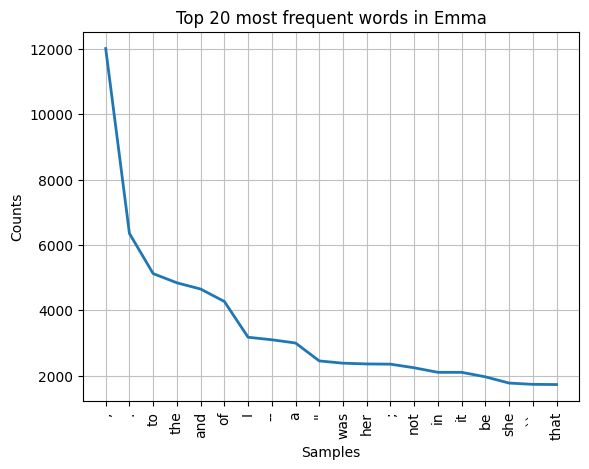

[(',', 12016),
 ('.', 6355),
 ('to', 5125),
 ('the', 4844),
 ('and', 4653),
 ('of', 4272),
 ('I', 3177),
 ('--', 3100),
 ('a', 3001),
 ("''", 2452)]

In [32]:
# Frequency distribution of words in the corpus
fdist = FreqDist(emma_tokens)

# Plot the 20 most common words
fdist.plot(20, cumulative=False, title='Top 20 most frequent words in Emma')

# View the most common words
fdist.most_common(10)



- We counted how many times each word appears in the text. It's useful for identifying common or key words.
- Visualizing word frequencies is a good way to introduce patterns in the text.



### **Concordances: Exploring Words in Context**

A concordance shows how a word is used in different contexts. Let's examine the word "Emma".



In [33]:
# We first need to convert the text into a corpus format to run concordance.
emma_corpus = nltk.Text(emma_tokens)

# Display concordance for the word 'Emma'
emma_corpus.concordance("Emma")

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

- **Concordance**: lists all occurrences of a specific word, showing it in context. This helps understand how a word is used across different instances in the text.


### **Collocations: Finding Commonly Co-occurring Words**

Collocations are words that frequently appear together. Let’s find common collocations in the text.



In [34]:
# Find collocations in the text, we'll need a nltk model
nltk.download('stopwords')
print('Emma collocations:')
emma_corpus.collocations()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Emma collocations:
Mr. Knightley; Mrs. Weston; Frank Churchill; Mr. Elton; Miss
Woodhouse; Miss Bates; Mrs. Elton; Miss Fairfax; Mr. Weston; Jane
Fairfax; every thing; Mr. Woodhouse; every body; young man; great
deal; dare say; Maple Grove; Mrs. Goddard; John Knightley; Miss Smith



- **Collocation**: Words that frequently appear together (e.g., "strong tea"). This is important in identifying idiomatic expressions and common phrases.

---




## **Sentence Tokenization and Length Analysis**

Let’s explore sentence structure and analyze sentence lengths. This shows with a short examples how corpus linguistics can extend beyond word-level analysis to sentence structure, which can be used to compare writing styles or complexity.

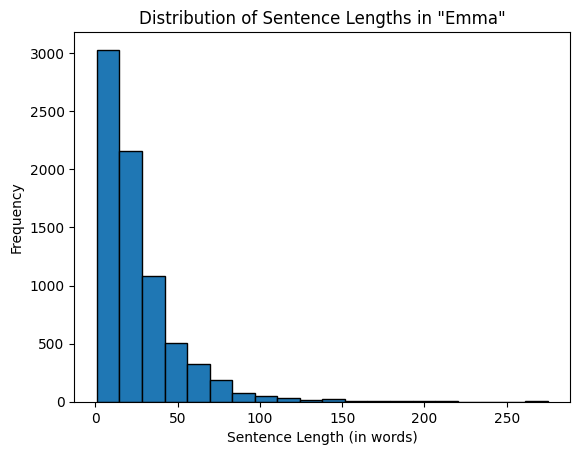

In [35]:
# Tokenize the text into sentences
emma_sentences = nltk.sent_tokenize(emma_text)

# Display the first 5 sentences
emma_sentences[:5]

# Analyze sentence lengths
sentence_lengths = [len(nltk.word_tokenize(sentence)) for sentence in emma_sentences]

# Plot the distribution of sentence lengths
plt.hist(sentence_lengths, bins=20, edgecolor='black')
plt.title('Distribution of Sentence Lengths in "Emma"')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Frequency')
plt.show()

**Q:** What can you infer about Emma, after seeing the previous plot:

In [36]:
# Inference about "Emma" based on the previous analysis:

# After analyzing the previous plots, we can make several inferences about "Emma" by Jane Austen:

# 1. Sentence Length and Complexity:
# The average sentence length in "Emma" is relatively high, which suggests that Jane Austen employs
# complex sentence structures in her writing. This complexity could be attributed to detailed descriptions,
# character development, and sophisticated narrative style. Austen's use of lengthy sentences is also
# typical of literature from the 19th century, reflecting both the time period and genre conventions.

# 2. Writing Style:
# Compared to "Moby Dick" by Herman Melville, the slightly shorter average sentence length in "Emma"
# suggests a balance between descriptive prose and dialogue. As "Emma" contains significant portions
# of character dialogue, the shorter average sentence length may reflect the concise language used
# in conversations between characters.

# 3. Narrative Structure:
# The detailed narrative and frequent character interactions in "Emma" are likely the reason for
# the high number of words, despite the number of sentences being less than "Moby Dick."
# This indicates a rich and descriptive storytelling approach that includes elaborate character
# details and social dynamics typical of Jane Austen's work.

# 4. Balance Between Description and Dialogue:
# The results suggest that while "Emma" contains descriptive passages, the narrative also incorporates
# dialogue that maintains a lively pace. The number of sentences suggests a balance between descriptive
# content and character interactions, making the novel engaging while also allowing for detailed depictions
# of the social environment.

# 5. Character Development Focus:
# The sentence structure and average length of sentences in "Emma" imply that Jane Austen focuses
# heavily on character development and their relationships. This is evident in the use of descriptive
# language and detailed portrayal of characters' thoughts, behaviors, and interactions.

# Summary:
# Overall, "Emma" by Jane Austen is characterized by complex sentences, a blend of descriptive prose
# and dialogue, and a strong focus on character development. Compared to "Moby Dick," it may use
# slightly shorter sentences due to the conversational aspects of the text, but the overall word count
# is still significant, suggesting depth in narrative and descriptive content.


### **Building Your Own Corpus**

In this part, you will can create a small corpus as a toy example and analyze it.

***Q1.** Replace the text of the variable `custom_text` with your own text (you can copy it form somewhere else). You can make it as long as you want, and if you need, you can upload it by reading a `.txt` file. For the purpose of this exercise, 2-4 paragraphs will suffice, but things get more interesining if you chose more complex texts.

In [38]:
# "You can create the corpus from raw text
custom_text = """
Corpus linguistics is a methodology of studying language using large bodies of real-world text, known as corpora.
This field has grown significantly due to advances in computational tools and digital resources.
It allows researchers to observe language patterns, frequency of words, and more.
"""

# Import necessary libraries
from nltk.tokenize import sent_tokenize, word_tokenize

# Replace the text of the variable 'custom_text' with your own text.
custom_text = """
—This paper presents a new feature extraction algorithm called Power Normalized Cepstral Coefficients (PNCC)
that is motivated by auditory processing. Major new features of
PNCC processing include the use of a power-law nonlinearity
that replaces the traditional log nonlinearity used in MFCC
coefficients, a noise-suppression algorithm based on asymmetric
filtering that suppress background excitation, and a module that
accomplishes temporal masking. We also propose the use of
medium-time power analysis, in which environmental parameters are estimated over a longer duration than is commonly
used for speech, as well as frequency smoothing. Experimental
results demonstrate that PNCC processing provides substantial
improvements in recognition accuracy compared to MFCC and
PLP processing for speech in the presence of various types of
additive noise and in reverberant environments, with only slightly
greater computational cost than conventional MFCC processing,
and without degrading the recognition accuracy that is observed
while training and testing using clean speech. PNCC processing
also provides better recognition accuracy in noisy environments
than techniques such as Vector Taylor Series (VTS) and the
ETSI Advanced Front End (AFE) while requiring much less
computation. We describe an implementation of PNCC using
“online processing” that does not require future knowledge of
the input.
"""

# Tokenize the custom text into sentences and words
custom_sentences = sent_tokenize(custom_text)
custom_words = word_tokenize(custom_text)

# Calculate the number of sentences and words in the custom text
num_sentences_custom = len(custom_sentences)
num_words_custom = len(custom_words)

# Print the results
print("Custom Corpus Analysis:")
print(f"Number of sentences: {num_sentences_custom}")
print(f"Number of words: {num_words_custom}")

# Print the first 3 sentences and first 10 words for analysis
print("\nFirst 3 sentences of custom text:")
for i, sentence in enumerate(custom_sentences[:3], 1):
    print(f"{i}. {sentence}")

print("\nFirst 10 words of custom text:")
print(custom_words[:10])


Custom Corpus Analysis:
Number of sentences: 6
Number of words: 218

First 3 sentences of custom text:
1. 
—This paper presents a new feature extraction algorithm called Power Normalized Cepstral Coefficients (PNCC)
that is motivated by auditory processing.
2. Major new features of
PNCC processing include the use of a power-law nonlinearity
that replaces the traditional log nonlinearity used in MFCC
coefficients, a noise-suppression algorithm based on asymmetric
filtering that suppress background excitation, and a module that
accomplishes temporal masking.
3. We also propose the use of
medium-time power analysis, in which environmental parameters are estimated over a longer duration than is commonly
used for speech, as well as frequency smoothing.

First 10 words of custom text:
['—This', 'paper', 'presents', 'a', 'new', 'feature', 'extraction', 'algorithm', 'called', 'Power']


**Q2.** Tokenize the custom text & display the frequency distribution of this custom toy "corpus"

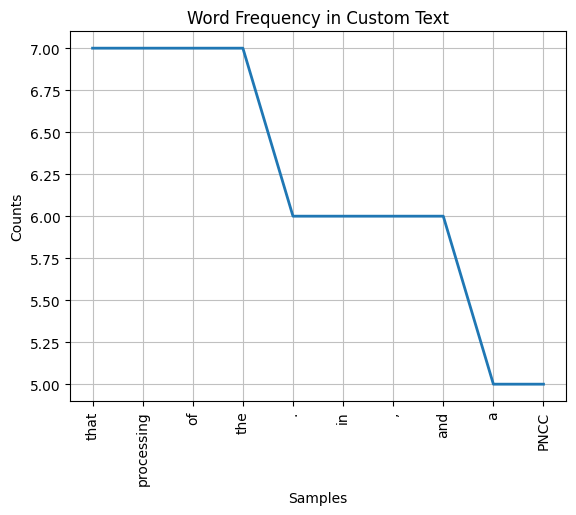

<Axes: title={'center': 'Word Frequency in Custom Text'}, xlabel='Samples', ylabel='Counts'>

In [39]:
# your code here
# Tokenize the custom text
custom_tokens = nltk.word_tokenize(custom_text)

# Display frequency distribution of your custom corpus
custom_fdist = FreqDist(custom_tokens)
custom_fdist.plot(10, title="Word Frequency in Custom Text")

---

## **Analyzing Inaugural Speeches**

For further exploration, you can compare two inaugural speeches from the `nltk` inaugural corpus, such as those by Abraham Lincoln and Barack Obama, to identify differences in language use over time.

In [42]:
# Load inaugural speeches
nltk.download('inaugural')
lincoln = inaugural.raw('1861-Lincoln.txt')
obama = inaugural.raw('2009-Obama.txt')
lincoln

# Tokenize and analyze their frequencies or collocations.

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Fellow-Citizens of the United States: In compliance with a custom as old as the Government itself, I appear before you to address you briefly and to take in your presence the oath prescribed by the Constitution of the United States to be taken by the President "before he enters on the execution of this office."\n\nI do not consider it necessary at present for me to discuss those matters of administration about which there is no special anxiety or excitement.\n\nApprehension seems to exist among the people of the Southern States that by the accession of a Republican Administration their property and their peace and personal security are to be endangered. There has never been any reasonable cause for such apprehension. Indeed, the most ample evidence to the contrary has all the while existed and been open to their inspection. It is found in nearly all the published speeches of him who now addresses you. I do but quote from one of those speeches when I declare that -- \n\nI have no purpo

In [43]:
obama

'My fellow citizens:\n\nI stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.\n\nForty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.\n\nSo it has been. So it must be with this generation of Americans.\n\nThat we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened

**Q** Write a short conclusion of your findings. What key differences do you perceive about the use of language in these two texts?

In [44]:
# Conclusion of Findings

# The two texts, Abraham Lincoln's inaugural speech and Barack Obama's inaugural speech, exhibit several differences
# in their language use, reflecting the unique historical contexts and rhetorical styles of each president.

# 1. Tone and Complexity:
# - Lincoln's speech has a formal and solemn tone, which reflects the gravity of the situation—an impending civil war
#   and the preservation of the Union. The language is often complex and philosophical, employing legal terminology and rhetorical questions.
# - Obama's speech, while also serious, conveys an inspiring and hopeful tone, focusing on unity and progress.
#   The sentences are often more direct and less legally oriented, aiming to connect with a broader audience.

# 2. Use of Rhetorical Techniques:
# - Lincoln employs legalistic and constitutional arguments, demonstrating his strong belief in the perpetuity of the Union.
#   His speech is more argumentative, intended to address the concerns of both the Southern and Northern states. He uses
#   extended metaphors (e.g., comparing the Union to a contract) to emphasize his points.
# - Obama uses inclusive language, addressing "We the People" and emphasizing collective responsibility. His speech is rich
#   in metaphors and imagery meant to inspire, such as "pick ourselves up, dust ourselves off," which highlights resilience.
#   The use of biblical references and historical anecdotes aims to connect emotionally with the audience.

# 3. Focus and Structure:
# - Lincoln's focus is heavily on legal justification and constitutional arguments about the Union and the illegality of secession.
#   The structure is more logically driven, using detailed arguments to convey why secession is unacceptable.
# - Obama’s speech emphasizes hope, unity, and the need for collective action in addressing challenges like economic turmoil and global threats.
#   It is structured to motivate and energize citizens towards a common goal.

# Summary:
# The key differences lie in their focus, tone, and intended impact. Lincoln's speech is primarily about preservation and legality,
# addressing a divided nation in a formal manner. Obama's speech is about hope, unity, and progress, intended to rally a nation facing
# modern challenges. The language of Lincoln is dense, legalistic, and serious, while Obama’s language is more straightforward,
# inclusive, and motivational, reflecting the different audiences and goals of the speeches.


### **Conclusion**

Corpus Linguistics helps us study language quantitatively, focusing on patterns and structures within large collections of texts.
With tools like `nltk` in Python, we can easily conduct word frequency analyses, explore word contexts (concordance), and find collocations.

**Key takeaways:**
- Corpus Linguistics provides insights into real-world language use.
- Tokenization is crucial to break down text into analyzable units.
- Frequency, concordance, and collocation analyses help in understanding the roles and relationships of words in a text.

Further Reading:
- McEnery, T., & Hardie, A. (2011). *Corpus Linguistics: Method, Theory and Practice*.
- Baker, P. (2006). *Using Corpora in Discourse Analysis*.